In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
city = citipy.nearest_city(22.99,120.21)
city

In [11]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kovylkino ru
yellowknife ca
pisco pe
rio grande br
port macquarie au
kavaratti in
camacha pt
san patricio mx
illoqqortoormiut gl
miri my
butaritari ki
kapaa us
mataura pf
roma au
rikitea pf
sitka us
vicuna cl
busselton au
albany au
mataura pf
ozernovskiy ru
kaitangata nz
ushuaia ar
faanui pf
port alfred za
samarai pg
nagahama jp
yellowknife ca
rikitea pf
kieta pg
santa isabel do rio negro br
belushya guba ru
pandan ph
malwan in
qaanaaq gl
kapaa us
launceston au
hermanus za
ushuaia ar
vaitupu wf
araouane ml
east london za
hermanus za
greymouth nz
carnarvon au
punta arenas cl
gondanglegi id
kunya ru
new norfolk au
ilulissat gl
hermanus za
pochutla mx
taolanaro mg
manzhouli cn
mankono ci
puerto ayora ec
kapaa us
skibbereen ie
hutchinson us
okhotsk ru
poum nc
provideniya ru
hilo us
ostersund se
dunedin nz
rampur in
lagoa pt
vaini to
busselton au
ushuaia ar
castro cl
pacifica us
lahaina us
mataura pf
tonj sd
busselton au
hithadhoo mv
huancavelica pe
constitucion mx
uglovskoye ru
arraial do 

shimoda jp
yulara au
rio cuarto ar
rocky mountain house ca
ushuaia ar
lulea se
ucluelet ca
ahipara nz
sunrise manor us
rikitea pf
santa rosalia mx
houston ca
lupac ro
dikson ru
kodiak us
ushuaia ar
bengkulu id
gat ly
east london za
champerico gt
kruisfontein za
belmonte br
bela pk
rikitea pf
hobart au
bethel us
ushuaia ar
punta arenas cl
faanui pf
arraial do cabo br
aklavik ca
martapura id
hamilton bm
mahebourg mu
tasbuget kz
sisimiut gl
vila franca do campo pt
minot us
chokurdakh ru
barentsburg sj
camacari br
rikitea pf
ushuaia ar
mataura pf
tiksi ru
punta arenas cl
luderitz na
barrow us
ponta do sol cv
teya ru
rikitea pf
yarada in
port blair in
saint-philippe re
mar del plata ar
lagoa pt
kapaa us
kerteh my
punta arenas cl
nizhneyansk ru
vaini to
san nicolas ph
mandalgovi mn
senno by
mount isa au
yellowknife ca
we nc
butaritari ki
awbari ly
rocha uy
lebu cl
marcona pe
rikitea pf
chuy uy
cape town za
shakawe bw
busselton au
luanda ao
mirandopolis br
tiksi ru
ribeira grande pt
zanatepec

guerrero negro mx
caucaia br
vaini to
corner brook ca
ketchikan us
seoul kr
barentsburg sj
albany au
saint anthony ca
ngunguru nz
kruisfontein za
kodiak us
puerto ayora ec
falealupo ws
whitehorse ca
butaritari ki
marana us
atuona pf
qaanaaq gl
cockburn town tc
namibe ao
punta arenas cl
albany au
vao nc
busselton au
punta arenas cl
hobart au
laguna br
bubaque gw
mataura pf
busselton au
lebu cl
chumphon th
faya td
tiksi ru
taolanaro mg
turukhansk ru
nizhneyansk ru
port alfred za
saint-philippe re
flinders au
plettenberg bay za
paamiut gl
saint-philippe re
puerto ayora ec
grand river south east mu
punta arenas cl
carutapera br
yenagoa ng
champerico gt
new norfolk au
torbay ca
thompson ca
nizhneyansk ru
albany au
puerto ayora ec
leh in
upernavik gl
chimore bo
new norfolk au
hermanus za
busselton au
kendari id
coihaique cl
malwan in
upernavik gl
antropovo ru
busselton au
port alfred za
marsabit ke
ushuaia ar
candawaga ph
castro cl
ribeira grande pt
izmit tr
albany au
punta arenas cl
vitoria

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2167aa2970a420bab9866a853b071f9


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kovylkino
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | rio grande
Processing Record 5 of Set 1 | port macquarie
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | camacha
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | miri
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | roma
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | vicuna
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ozernovskiy
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | ushuaia
Processing 

Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | husavik
Processing Record 39 of Set 4 | patiya
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 4 | nim ka thana
City not found. Skipping...
Processing Record 43 of Set 4 | umm kaddadah
Processing Record 44 of Set 4 | ixtapa
Processing Record 45 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 4 | yar-sale
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | vestbygda
City not found. Skipping...
Processing Record 49 of Set 4 | timizart
Processing Record 50 of Set 4 | sabaudia
Processing Record 1 of Set 5 | canton
Processing Record 2 of Set 5 | sataua
City not found. Skipping...
Processing Record 3 of Set 5 | hurghada
Processing Record 4 of Set 5 | verkhoturye
Processing Record 5 of Set 5 | barrow
Processing Record 6 of Set 5 | muros
Processing Reco

Processing Record 26 of Set 8 | kerteh
City not found. Skipping...
Processing Record 27 of Set 8 | san nicolas
Processing Record 28 of Set 8 | senno
Processing Record 29 of Set 8 | mount isa
Processing Record 30 of Set 8 | we
City not found. Skipping...
Processing Record 31 of Set 8 | awbari
Processing Record 32 of Set 8 | rocha
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | chuy
Processing Record 35 of Set 8 | shakawe
Processing Record 36 of Set 8 | mirandopolis
Processing Record 37 of Set 8 | zanatepec
City not found. Skipping...
Processing Record 38 of Set 8 | hirara
Processing Record 39 of Set 8 | lufkin
Processing Record 40 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 8 | lucea
Processing Record 42 of Set 8 | potam
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | kjollefjord
Processing Record 45 of Set 8 | kankan
Processing Record 46 of Set 8 | geraldton
Processing Record

Processing Record 14 of Set 12 | kinablangan
Processing Record 15 of Set 12 | grande-riviere
City not found. Skipping...
Processing Record 16 of Set 12 | roebourne
Processing Record 17 of Set 12 | amalapuram
Processing Record 18 of Set 12 | chicama
Processing Record 19 of Set 12 | honiara
Processing Record 20 of Set 12 | mujiayingzi
Processing Record 21 of Set 12 | coquimbo
Processing Record 22 of Set 12 | chalus
Processing Record 23 of Set 12 | curup
Processing Record 24 of Set 12 | katsuura
Processing Record 25 of Set 12 | sukumo
Processing Record 26 of Set 12 | asfi
Processing Record 27 of Set 12 | yichang
Processing Record 28 of Set 12 | shihezi
Processing Record 29 of Set 12 | kudahuvadhoo
Processing Record 30 of Set 12 | kragujevac
Processing Record 31 of Set 12 | yabelo
Processing Record 32 of Set 12 | baiyin
Processing Record 33 of Set 12 | havoysund
Processing Record 34 of Set 12 | raudeberg
Processing Record 35 of Set 12 | saint-georges
Processing Record 36 of Set 12 | thinad

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kovylkino,54.04,43.91,42.62,87,0,0.92,RU,2020-11-04 05:30:35
1,Yellowknife,62.46,-114.35,6.80,84,90,10.29,CA,2020-11-04 05:30:35
2,Pisco,-13.70,-76.22,62.60,82,0,6.93,PE,2020-11-04 05:30:36
3,Rio Grande,-32.03,-52.10,55.00,93,10,1.01,BR,2020-11-04 05:30:36
4,Port Macquarie,-31.43,152.92,75.99,51,30,1.99,AU,2020-11-04 05:30:36
5,Kavaratti,10.57,72.64,82.80,70,0,4.65,IN,2020-11-04 05:30:36
6,Camacha,33.08,-16.33,60.80,82,40,18.34,PT,2020-11-04 05:30:37
7,San Patricio,28.02,-97.52,59.00,93,20,3.36,US,2020-11-04 05:30:37
8,Miri,4.41,114.01,87.01,74,40,9.17,MY,2020-11-04 05:30:01
9,Butaritari,3.07,172.79,81.64,72,86,16.28,KI,2020-11-04 05:30:38


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kovylkino,RU,2020-11-04 05:30:35,54.04,43.91,42.62,87,0,0.92
1,Yellowknife,CA,2020-11-04 05:30:35,62.46,-114.35,6.80,84,90,10.29
2,Pisco,PE,2020-11-04 05:30:36,-13.70,-76.22,62.60,82,0,6.93
3,Rio Grande,BR,2020-11-04 05:30:36,-32.03,-52.10,55.00,93,10,1.01
4,Port Macquarie,AU,2020-11-04 05:30:36,-31.43,152.92,75.99,51,30,1.99
5,Kavaratti,IN,2020-11-04 05:30:36,10.57,72.64,82.80,70,0,4.65
6,Camacha,PT,2020-11-04 05:30:37,33.08,-16.33,60.80,82,40,18.34
7,San Patricio,US,2020-11-04 05:30:37,28.02,-97.52,59.00,93,20,3.36
8,Miri,MY,2020-11-04 05:30:01,4.41,114.01,87.01,74,40,9.17
9,Butaritari,KI,2020-11-04 05:30:38,3.07,172.79,81.64,72,86,16.28


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

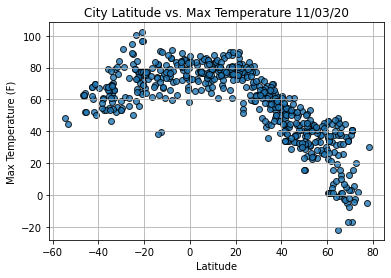

In [19]:
%matplotlib inline

import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

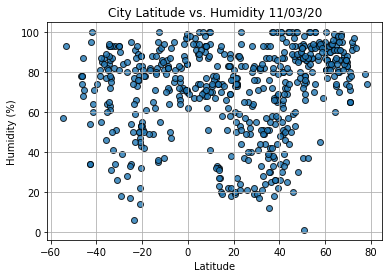

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

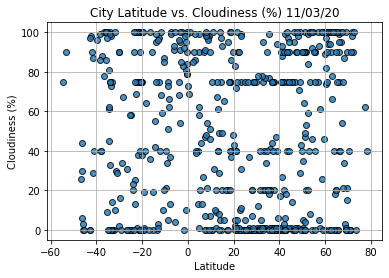

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

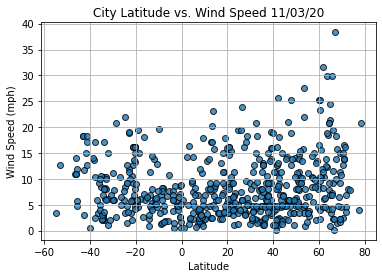

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()